In [ ]:
! pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8492 sha256=d3b833bd63309a400745a3347d74807606df399fa34e0363b1c6f1871c3d61b2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [1]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("GOOGL", start="2019-01-02", end="2020-04-30")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-01-02,52.73
2019-01-03,51.27
2019-01-04,53.90
2019-01-07,53.80
2019-01-08,54.27


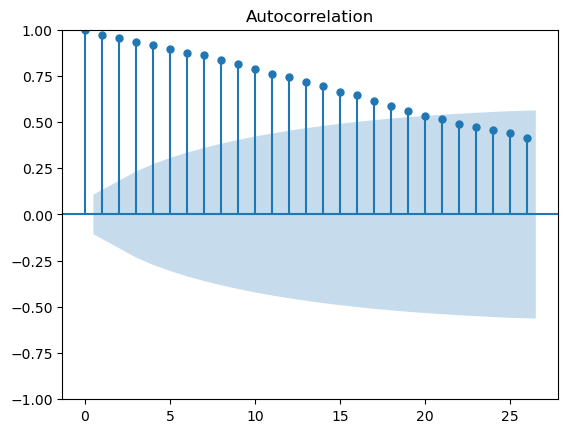

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()

The shaded region is the confidence interval with a default value of α = 0.05.
Anything within this range represents a value that has no significant correlation with the most recent value for the price.

The vertical lines with markers at their tops are the “lags” that represent a specific number (25, in this case) 
of previous values. These represent the correlation value (shown on the y-axis) and diminish at a steady rate as their proximity from the current price increases.

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


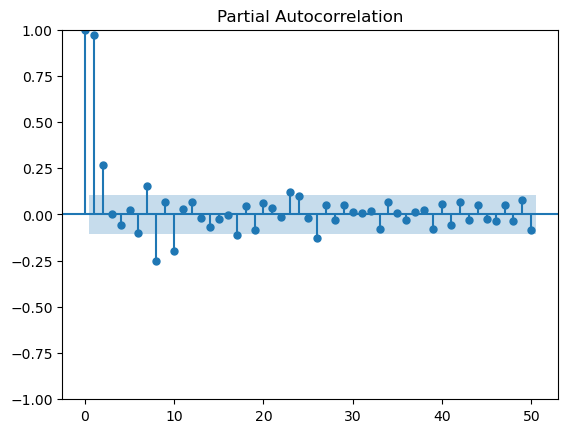

In [3]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(data, alpha =0.05, lags=50)
plt.show()
  


In [4]:
# Import kpss
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(1.3785933075157457, 0.01, 11, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 1.38
5% Critical Value: 0.46
p-value: 0.01


/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


the p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is not stationary. This is consistent with the result obtained with the ADF test.

/var/folders/gw/y4dl2m9n7sjgz9jqdm3ht3t80000gn/T/ipykernel_1881/1155398679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Difference'] = data['Close'].diff()


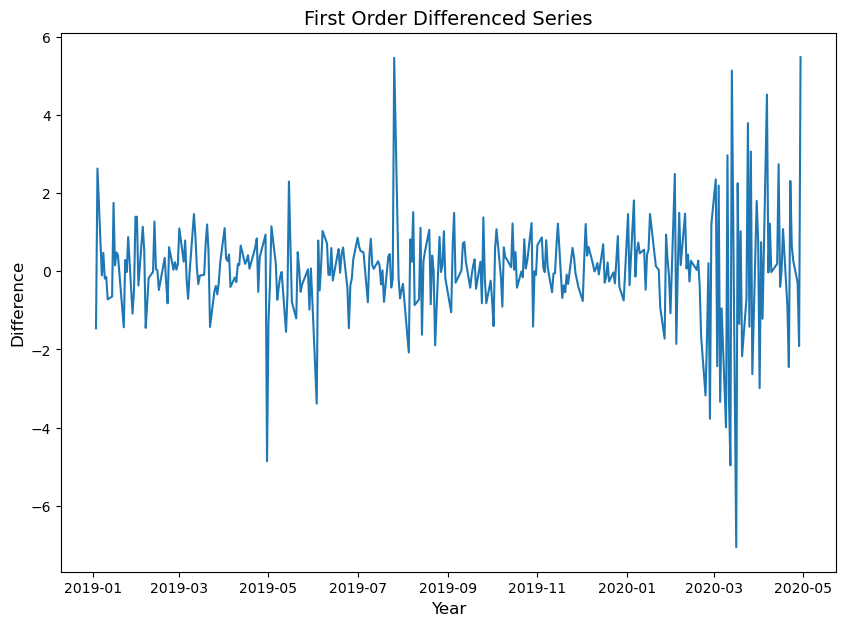

In [5]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Difference'] = data['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [6]:
#Code for Durbin Watson test
import numpy as np
import statsmodels.api as sm
X =np.arange(len(data))
Y = np.asarray(data)
X = sm.add_constant(X)
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

array([0.08234504,        nan])

DW is closer to 0 so we have positive autocorrelation